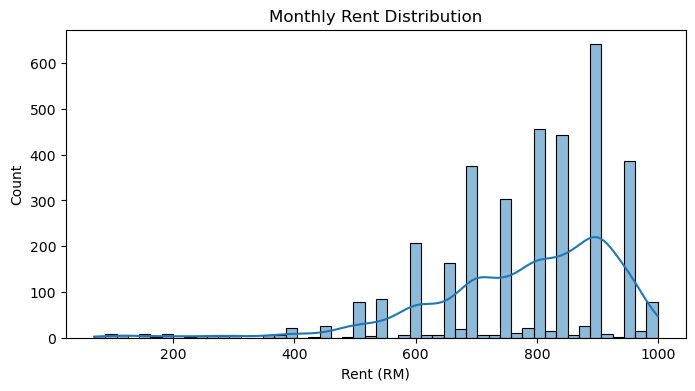

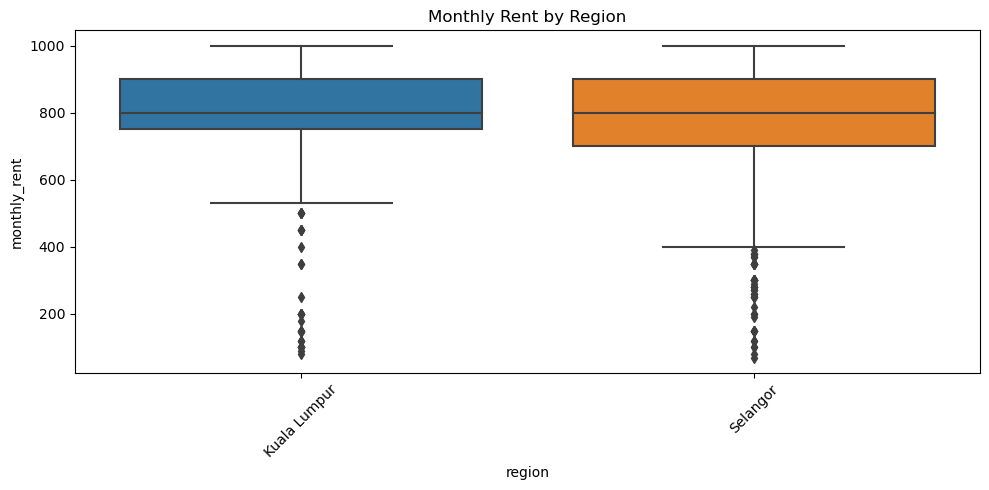

,ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region,price_per_sqft,furnished_encoded,region_encoded,property_type_encoded,location_encoded
0,100235971,Taman Connaught,NaN,900.0,Kuala Lumpur - Cheras,Apartment,2.0,1.0,1.0,550,Partially Furnished,"Parking, Security, Lift, Playground, Jogging T...","Cooking Allowed, Near KTM/LRT",Kuala Lumpur,1.636364,2,0,0,9
1,100320933,Pangsapuri Seroja,NaN,850.0,Kuala Lumpur - Jinjang,Apartment,3.0,NaN,2.0,750,Partially Furnished,Lift,"Near KTM/LRT, Cooking Allowed",Kuala Lumpur,1.133333,2,0,0,17
2,100255260,The Nest Residence @ Genting Klang,NaN,900.0,Kuala Lumpur - Setapak,Service Residence,1.0,1.0,1.0,360,Fully Furnished,"Swimming Pool, Minimart, Tennis Court, Squash ...",NaN,Kuala Lumpur,2.5,0,0,4,38
3,100320315,Apartment Sentul,NaN,700.0,Kuala Lumpur - Sentul,Apartment,3.0,NaN,1.0,700,Not Furnished,"Parking, Lift",Cooking Allowed,Kuala Lumpur,1.0,1,0,0,35
4,96409547,Teratai Mewah Apartment,NaN,850.0,Kuala Lumpur - Setapak,Apartment,3.0,NaN,1.0,650,Not Furnished,"Playground, Parking, Security, Lift",Cooking Allowed,Kuala Lumpur,1.307692,1,0,0,38


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ========== 1. Load Data ==========
df = pd.read_csv(r"C:\Users\user\OneDrive\Desktop\mudah-apartment-price-predictor\data\mudah-apartment-kl-selangor.csv")

# ========== 2. Clean 'monthly_rent' ==========
df.loc[:, 'monthly_rent'] = df['monthly_rent'].str.replace('RM', '', regex=False)\
                                               .str.replace('per month', '', regex=False)\
                                               .str.replace(',', '', regex=False)\
                                               .str.strip()
df.loc[:, 'monthly_rent'] = pd.to_numeric(df['monthly_rent'], errors='coerce')

# ========== 3. Clean 'size' ==========
df.loc[:, 'size'] = df['size'].str.replace('sq.ft.', '', regex=False)\
                               .str.replace(',', '', regex=False)\
                               .str.strip()
df.loc[:, 'size'] = pd.to_numeric(df['size'], errors='coerce')

# ========== 4. Clean 'rooms' ==========
df.loc[:, 'rooms'] = pd.to_numeric(df['rooms'], errors='coerce')

# ========== 5. Remove invalid and extreme 'size' values ==========
df = df[df['size'] != 99999999]           # remove known error
df = df[df['size'] < 10000]              # remove extreme outliers

# ========== 6. Drop rows with missing critical values ==========
df_clean = df.dropna(subset=['monthly_rent', 'rooms', 'size', 'furnished', 'region']).copy()

# ========== 7. Reset index ==========
df_clean.reset_index(drop=True, inplace=True)

# ========== 8. Feature Engineering ==========
df_clean.loc[:, 'price_per_sqft'] = df_clean['monthly_rent'] / df_clean['size']

# ========== 9. Encode Categorical Variables ==========
df_clean.loc[:, 'furnished_encoded'] = df_clean['furnished'].astype('category').cat.codes
df_clean.loc[:, 'region_encoded'] = df_clean['region'].astype('category').cat.codes
df_clean.loc[:, 'property_type_encoded'] = df_clean['property_type'].astype('category').cat.codes
df_clean.loc[:, 'location_encoded'] = df_clean['location'].astype('category').cat.codes

# ========== 10. Quick EDA: Rent Distribution ==========
plt.figure(figsize=(8, 4))
sns.histplot(df_clean['monthly_rent'], bins=50, kde=True)
plt.title('Monthly Rent Distribution')
plt.xlabel('Rent (RM)')
plt.ylabel('Count')
plt.show()

# ========== 11. Quick EDA: Rent by Region ==========
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_clean, x='region', y='monthly_rent')
plt.xticks(rotation=45)
plt.title('Monthly Rent by Region')
plt.tight_layout()
plt.show()

# ========== 12. Final Preview ==========
df_clean.head()
